In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import krippendorff

### Intercoder reliability

In [2]:
icr = pd.read_csv("newsfactor_ICR.csv", header = 1, delimiter = ",")
icr.columns

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language', 'coder', 'topic', 'surprise1',
       'controversy1', 'scope1', 'positive_consequences1',
       'negative_consequences1', 'elite_persons1', 'surprise2', 'controversy2',
       'scope2', 'positive_consequences2', 'negative_consequences2',
       'elite_persons2', 'surprise3', 'controversy3', 'scope3',
       'positive_consequences3', 'negative_consequences3', 'elite_persons3',
       'topic_label'],
      dtype='object')

In [3]:
icr1 = icr[['coder','topic','topic_label','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1']]
icr1.drop(index = icr1.index[0], axis=0, inplace=True)
icr1.rename(columns={'surprise1': 'surprise',
                 'controversy1': 'controversy',
                 'scope1': 'scope',
                'positive_consequences1': 'positive_consequences',
                'negative_consequences1': 'negative_consequences', 
                'elite_persons1': 'elite_persons',}, inplace=True)

<ipython-input-3-1a2992387034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr1.drop(index = icr1.index[0], axis=0, inplace=True)
<ipython-input-3-1a2992387034>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr1.rename(columns={'surprise1': 'surprise',


In [4]:
icr2 = icr[['coder','topic','topic_label','surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2']]
icr2.drop(index = icr2.index[0], axis=0, inplace=True)
icr2.rename(columns={'surprise2': 'surprise',
                 'controversy2': 'controversy',
                 'scope2': 'scope',
                'positive_consequences2': 'positive_consequences',
                'negative_consequences2': 'negative_consequences', 
                'elite_persons2': 'elite_persons',}, inplace=True)

<ipython-input-4-2d383417ba0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr2.drop(index = icr2.index[0], axis=0, inplace=True)
<ipython-input-4-2d383417ba0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr2.rename(columns={'surprise2': 'surprise',


In [5]:
icr3 = icr[['coder','topic','topic_label','surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']]
icr3.drop(index = icr3.index[0], axis=0, inplace=True)
icr3.rename(columns={'surprise3': 'surprise',
                 'controversy3': 'controversy',
                 'scope3': 'scope',
                'positive_consequences3': 'positive_consequences',
                'negative_consequences3': 'negative_consequences', 
                'elite_persons3': 'elite_persons',}, inplace=True)

<ipython-input-5-1b43cfe62320>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr3.drop(index = icr3.index[0], axis=0, inplace=True)
<ipython-input-5-1b43cfe62320>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icr3.rename(columns={'surprise3': 'surprise',


In [6]:
icr1 = icr1.append([icr2, icr3])

<ipython-input-6-9045127fff14>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  icr1 = icr1.append([icr2, icr3])


In [7]:
icr1.dtypes

coder                    object
topic                    object
topic_label              object
surprise                 object
controversy              object
scope                    object
positive_consequences    object
negative_consequences    object
elite_persons            object
dtype: object

In [8]:
icr1[['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']] = icr1[['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']].apply(pd.to_numeric)

In [9]:
coder1 = icr1[icr1['coder'] == '1']
coder2 = icr1[icr1['coder'] == '2']

In [10]:
for c in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
        print(c)
        k = krippendorff.alpha((coder1[c].values.tolist(), 
                        coder2[c].values.tolist()), level_of_measurement="ordinal")
        print(k)

surprise
1.0
controversy
0.8808808808808809
scope
0.8016666666666666
positive_consequences
0.899464939453675
negative_consequences
1.0
elite_persons
0.9427609427609428


### Dataset preparation

In [11]:
icr = icr[icr['coder'] == '1']

In [12]:
icr = icr[['topic','topic_label','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']]
icr.head()

,topic,topic_label,surprise1,controversy1,scope1,positive_consequences1,negative_consequences1,elite_persons1,surprise2,controversy2,scope2,positive_consequences2,negative_consequences2,elite_persons2,surprise3,controversy3,scope3,positive_consequences3,negative_consequences3,elite_persons3
1,13,aviation issues,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
2,16,workplace equality,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,3,financial issues,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,0,COVID issues,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0
5,117,banking issues,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [13]:
len(icr)

20

In [14]:
icr[['topic','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']] = icr[
    ['topic','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']].apply(pd.to_numeric)

In [15]:
def overall_newsfactors(row):
    for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
        col1 = col + '1'
        col2 = col + '2'
        col3 = col + '3'

        if row[col1] + row[col2] + row[col3] >= 2:
            row[col] = 1

        else:
             row[col] = 0

    return row

In [16]:
icr = icr.apply(overall_newsfactors, axis=1)
icr.head()

,topic,topic_label,surprise1,controversy1,scope1,positive_consequences1,negative_consequences1,elite_persons1,surprise2,controversy2,...,scope3,positive_consequences3,negative_consequences3,elite_persons3,surprise,controversy,scope,positive_consequences,negative_consequences,elite_persons
1,13,aviation issues,0,0,1,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,16,workplace equality,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3,financial issues,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,COVID issues,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
5,117,banking issues,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [17]:
icr = icr[['topic','topic_label','surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']]

Prepare manual coding data for the rest of the topics

In [18]:
news_factors = pd.read_csv("newsfactor.csv", header = 1, delimiter = ",")
news_factors.drop(index = news_factors.index[0], axis=0, inplace=True)
news_factors.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,positive_consequences2,negative_consequences2,elite_persons2,surprise3,controversy3,scope3,positive_consequences3,negative_consequences3,elite_persons3,topic_label
1,2022-06-09 23:05:56,2022-06-09 23:14:58,IP Address,82.168.141.116,100,542,True,2022-06-09 23:14:59,R_2CV7uZD8L25C2nm,NaN,...,0,0,0,0,0,0,0,0,0,Netflix films
2,2022-06-09 23:15:00,2022-06-09 23:26:13,IP Address,82.168.141.116,100,672,True,2022-06-09 23:26:13,R_1mCxeKlrupHZwtP,NaN,...,1,0,0,0,0,0,0,0,0,black friday deals
3,2022-06-09 23:26:14,2022-06-09 23:30:02,IP Address,82.168.141.116,100,228,True,2022-06-09 23:30:02,R_yW5iZddPWEplXQl,NaN,...,0,0,1,0,0,0,0,0,1,US president issues
4,2022-06-09 23:30:04,2022-06-09 23:33:03,IP Address,82.168.141.116,100,178,True,2022-06-09 23:33:03,R_1jlyJsQyQh2Rhou,NaN,...,0,0,1,0,0,1,0,1,0,afghan war
5,2022-06-09 23:33:04,2022-06-09 23:40:25,IP Address,82.168.141.116,100,440,True,2022-06-09 23:40:25,R_3NDFJP8VFPj9KOb,NaN,...,1,0,0,0,0,1,0,1,0,outages caused by severe weather


In [19]:
news_factors = news_factors[['topic','topic_label','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']]
news_factors.head()

,topic,topic_label,surprise1,controversy1,scope1,positive_consequences1,negative_consequences1,elite_persons1,surprise2,controversy2,scope2,positive_consequences2,negative_consequences2,elite_persons2,surprise3,controversy3,scope3,positive_consequences3,negative_consequences3,elite_persons3
1,1,Netflix films,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,22,black friday deals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,23,US president issues,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1
4,84,afghan war,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
5,36,outages caused by severe weather,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0


In [20]:
news_factors[['topic','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']] = news_factors[
    ['topic','surprise1', 'controversy1', 'scope1', 'positive_consequences1', 'negative_consequences1', 'elite_persons1',
          'surprise2', 'controversy2', 'scope2', 'positive_consequences2', 'negative_consequences2', 'elite_persons2',
          'surprise3', 'controversy3', 'scope3', 'positive_consequences3', 'negative_consequences3', 'elite_persons3']].apply(pd.to_numeric)

In [21]:
news_factors = news_factors.apply(overall_newsfactors, axis=1)
news_factors.head()

,topic,topic_label,surprise1,controversy1,scope1,positive_consequences1,negative_consequences1,elite_persons1,surprise2,controversy2,...,scope3,positive_consequences3,negative_consequences3,elite_persons3,surprise,controversy,scope,positive_consequences,negative_consequences,elite_persons
1,1,Netflix films,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,black friday deals,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,US president issues,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,84,afghan war,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
5,36,outages caused by severe weather,0,0,1,1,1,0,0,0,...,1,0,1,0,0,0,1,1,1,0


In [22]:
news_factors = news_factors[['topic','topic_label','surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']]

In [23]:
news_factors = news_factors.append(icr) # get the full news factor dataset for all topics

<ipython-input-23-8d948eda7fae>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news_factors = news_factors.append(icr) # get the full news factor dataset for all topics


In [24]:
len(news_factors)

172

In [25]:
news_factors.dtypes

topic                     int64
topic_label              object
surprise                  int64
controversy               int64
scope                     int64
positive_consequences     int64
negative_consequences     int64
elite_persons             int64
dtype: object

Prepare the tweets dataset

In [2]:
all_topic = pd.read_csv("all_topic.csv", header = 0, delimiter = ",")
all_topic.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
all_topic.head()

,created_at,text,id,author_id,lang,username,text_clean,source_media,topic,probs
0,2021-12-31 12:06:05,'That was not the basis of the CDC's decision'...,1476887381336801280,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.707392
1,2021-12-30 02:46:02,'That was not the basis of the CDC's decision'...,1476384051154112512,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.698642
2,2021-12-29 13:31:07,'That was not the basis of the CDC's decision'...,1476184003526938624,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.708475
3,2021-12-29 06:31:02,'That was not the basis of the CDC's decision'...,1476078288661581824,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.713273
4,2021-08-25 19:34:01,Delta Air Lines CEO tells employees that they ...,1430614459077349376,2836421,en,MSNBC,delta air lines ceo tells employees that they ...,1,13,0.600323


In [3]:
all_topic = all_topic[all_topic.topic != -1] # remove the outlier topic
all_topic.reset_index(drop=True, inplace=True)

In [4]:
len(all_topic)

98859

In [5]:
all_topic["topic"].value_counts()

0      6209
1      4286
2      3512
3      3502
4      3369
       ... 
167     111
168     108
169     107
170     106
171     101
Name: topic, Length: 172, dtype: int64

In [29]:
all_topic['Date'] = pd.to_datetime(all_topic['created_at'])

In [46]:
# aggregate the tweets on one-day level
df = all_topic.groupby([pd.Grouper(key='Date', axis=0, freq='1D', sort=True), 'topic', 'source_media']).size().unstack(fill_value=0)
df = df.reset_index()
df.rename(columns={0: 'attention_organization', 1: 'attention_media'}, inplace=True)

In [32]:
len(df)

19438

Merge with the news factors dataset

In [33]:
df.dtypes

source_media
Date                      datetime64[ns]
topic                              int64
attention_organization             int64
attention_media                    int64
dtype: object

In [34]:
all_data = df.merge(news_factors, on='topic', how='right')

In [35]:
len(all_data)

19438

In [37]:
all_data['newsworthiness'] = all_data.iloc[:, 5:11].sum(axis=1)

Create lagged IV and DV

In [39]:
data = pd.DataFrame()

for n in np.arange(0,172):
    df = all_data.loc[all_data['topic'] == n]
    df['lag_attention_media'] = df['attention_media'].shift(1)
    df['lag_attention_organization'] = df['attention_organization'].shift(1)
    df = df.iloc[1:,:] #drop first row, because the lag_attention_media and lag_attention_organization will be nan
    data = data.append(df,ignore_index=True)

<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipytho

<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipytho

<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipytho

<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

<ipython-input-39-ae8704d0c55c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df,ignore_index=True)
<ipython-input-39-ae8704d0c55c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
<ipython-input-39-ae8704d0c55c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
<ipytho

In [40]:
len(data) #172 first rows were dropped, which is in accordance with the number of topics, so the codes worked correctly

19266

In [42]:
data.to_csv("final_data.csv", sep = ",")

### Visualization

In [6]:
data = pd.read_csv("final_data.csv", header = 0, delimiter = ",")
data.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
top5 = data.loc[data['topic'].isin([0,1,2,3,4])]

In [13]:
top5 = top5.groupby(['topic_label', pd.Grouper(key='Date', freq='W-MON')])[['attention_organization', 'attention_media']].sum().reset_index().sort_values('Date')

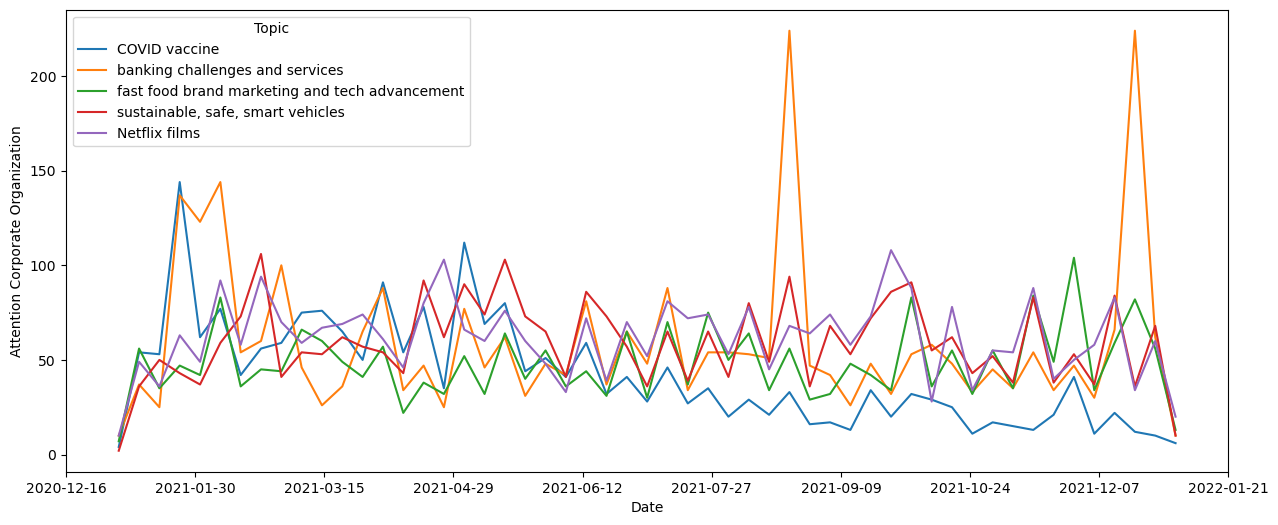

In [17]:
# Plot the change of the corporate organizations' attention
fig, ax = plt.subplots(figsize=(15,6))
plot = sns.lineplot(x='Date', y='attention_organization', hue='topic_label', data=top5)
plot.legend(title="Topic")
plot.set_ylabel("Attention Corporate Organization")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))

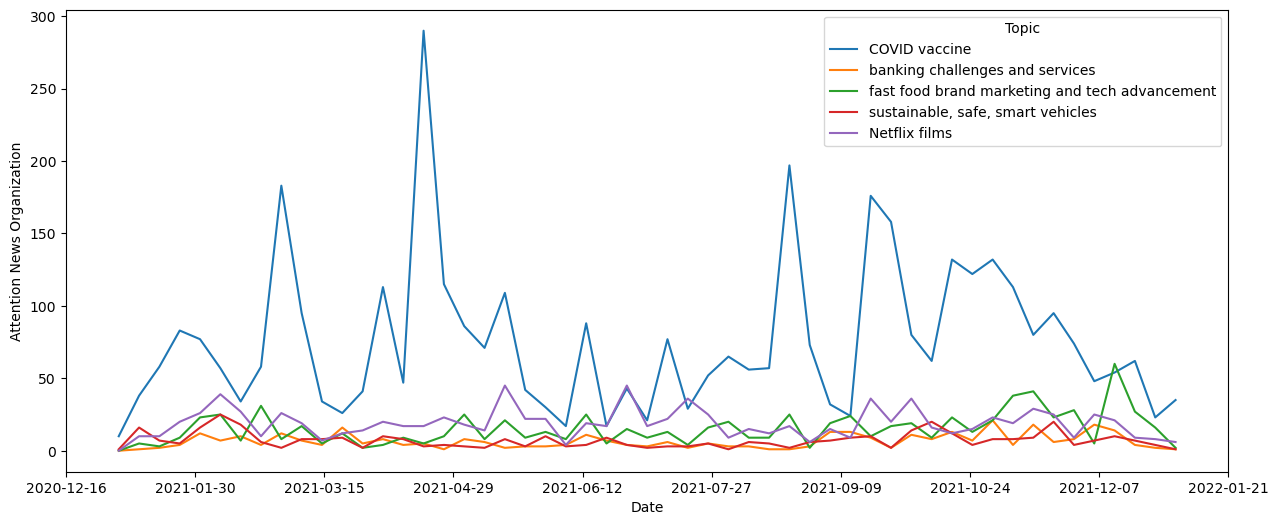

In [18]:
# Plot the change of the media organizations' attention
fig, ax = plt.subplots(figsize=(15,6))
plot = sns.lineplot(x='Date', y='attention_media', hue='topic_label', data=top5)
plot.legend(title="Topic")
plot.set_ylabel("Attention News Organization")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))

### Descriptive statistcs

In [4]:
news_factors.head()

,Unnamed: 0,topic,topic_label,surprise,controversy,scope,positive_consequences,negative_consequences,elite_persons,newsworthiness
0,1,1,Netflix films,0,0,0,0,0,0,0
1,2,22,black friday deals,0,0,0,0,0,0,0
2,3,23,US president issues,0,1,0,0,0,1,2
3,4,84,afghan war,0,0,1,0,1,0,2
4,5,36,outages caused by severe weather,0,0,1,1,1,0,3


In [48]:
news_factors['newsworthiness'] = news_factors.iloc[:, 2:8].sum(axis=1)

In [49]:
news_factors['newsworthiness'].value_counts()

0    74
1    69
2    26
3     3
Name: newsworthiness, dtype: int64

In [51]:
news_factors[['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']].value_counts()

surprise  controversy  scope  positive_consequences  negative_consequences  elite_persons
0         0            0      0                      0                      0                74
                              1                      0                      0                47
                       1      1                      0                      0                17
                              0                      0                      0                 8
                       0      0                      0                      1                 7
                                                     1                      0                 7
                       1      0                      1                      0                 4
                       0      0                      1                      1                 1
                              1                      0                      1                 1
                                              

In [52]:
for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
    s = news_factors[col].value_counts()
    print(s)

0    172
Name: surprise, dtype: int64
0    170
1      2
Name: controversy, dtype: int64
0    139
1     33
Name: scope, dtype: int64
0    105
1     67
Name: positive_consequences, dtype: int64
0    157
1     15
Name: negative_consequences, dtype: int64
0    159
1     13
Name: elite_persons, dtype: int64


In [5]:
data = pd.read_csv("final_data.csv", header = 0, delimiter = ",")
data.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
data.head()

,Date,topic,attention_organization,attention_media,topic_label,surprise,controversy,scope,positive_consequences,negative_consequences,elite_persons,newsworthiness,lag_attention_media,lag_attention_organization
0,2021-01-03,0,4,10,COVID issues,0,0,0,0,0,0,0,4.0,6.0
1,2021-01-05,0,16,7,COVID issues,0,0,0,0,0,0,0,10.0,4.0
2,2021-01-07,0,9,14,COVID issues,0,0,0,0,0,0,0,7.0,16.0
3,2021-01-09,0,3,7,COVID issues,0,0,0,0,0,0,0,14.0,9.0
4,2021-01-11,0,26,10,COVID issues,0,0,0,0,0,0,0,7.0,3.0


In [15]:
for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons', 'newsworthiness']:
    s = data.groupby([col])[['attention_organization', 'attention_media']].sum()
    print(s)

          attention_organization  attention_media
surprise                                         
0                          77650            20805
             attention_organization  attention_media
controversy                                         
0                             77597            19205
1                                53             1600
       attention_organization  attention_media
scope                                         
0                       61534            13822
1                       16116             6983
                       attention_organization  attention_media
positive_consequences                                         
0                                       37885            17974
1                                       39765             2831
                       attention_organization  attention_media
negative_consequences                                         
0                                       76071            17562
1        